## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from highlight_text import ax_text, fig_text
from pyfonts import load_google_font
from drawarrow import ax_arrow
from pypalettes import load_cmap

## Read and adjust dataframe, load fonts

In [2]:
df = pd.read_csv('share-of-births-by-age-of-mother.csv',
                index_col='Year',
                usecols=['Year',
                        'Share of births by mothers aged 10-19',
                        'Share of births by mothers aged 20-29',
                        'Share of births by mothers aged 30-39',
                        'Share of births by mothers aged 40-49'])

df = df.loc[[1975, 2023]].T

fonts = {
    'header' : load_google_font('Libre Baskerville'),
    'labels': load_google_font('Lato'), #Quicksand
    'callouts': load_google_font('Lato') # Oswald
} 

## Visualise the data

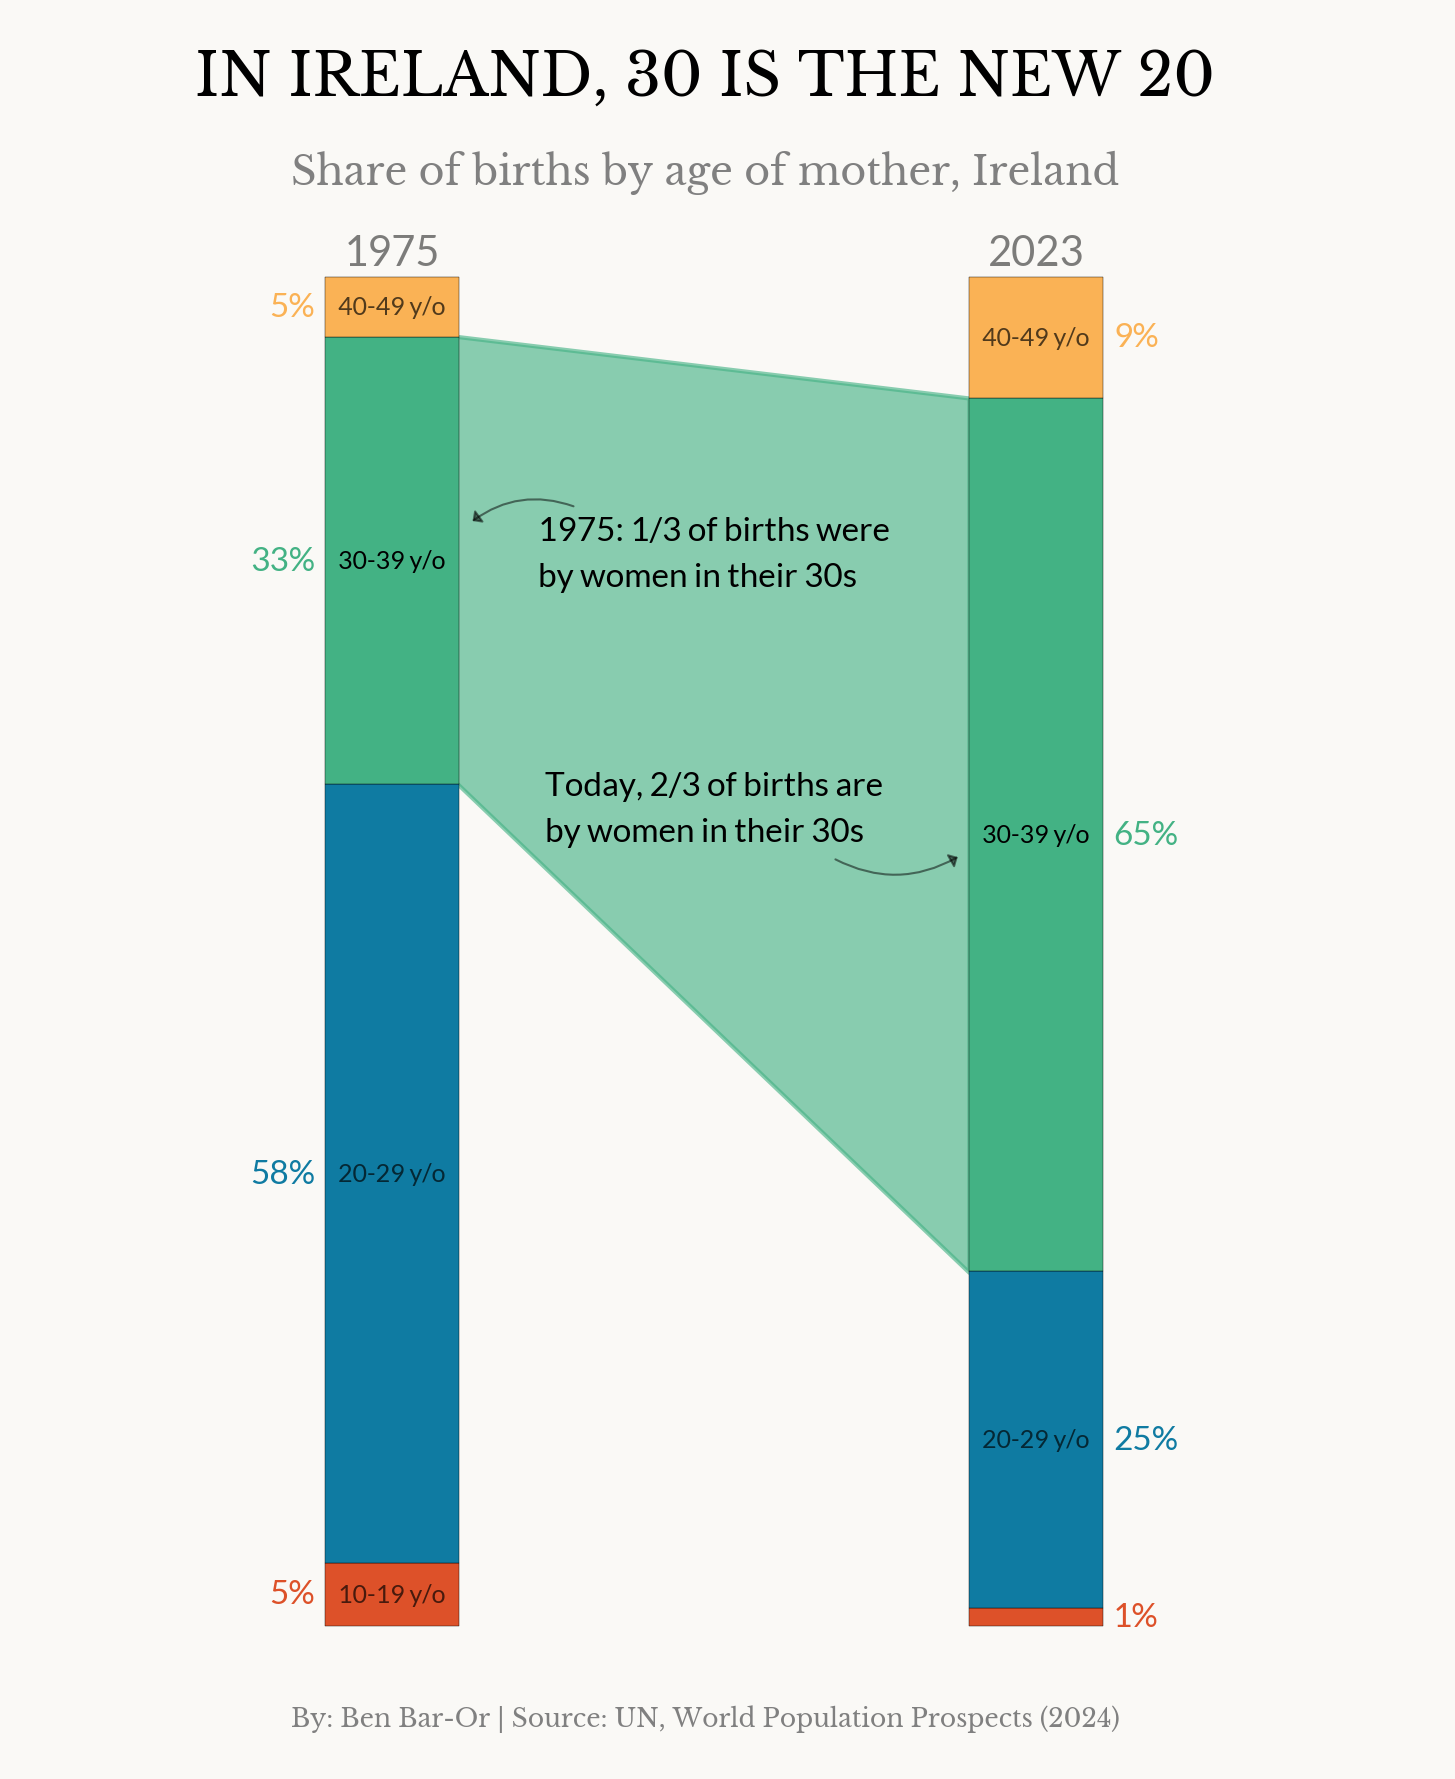

In [4]:
cmap = load_cmap("Egypt") # MurePepino another interesting pallat
colors = cmap.colors

age_groups = ['10-19 y/o', '20-29 y/o','30-39 y/o','40-49 y/o']

fig, ax = plt.subplots(dpi = 300, figsize = (6,6.25))

# Loop over each column in the dataframe (i.e., years: 1975 and 2023)
for year in df.columns:
    bottom = 0                    # Initialize the bottom of the stacked bar at 0
    y = df[year].values           # Extract the values for each year

    # Loop over each age group value for the current year and plot it
    for i, val in enumerate(y):    
        ax.bar(year, val, bottom = bottom, 
               color = cmap.colors[i], width = 10, 
               edgecolor = 'black', lw = 0.1)
        
        # Add the age group label inside the bar segment        
        ax_text(year, bottom + val/2, 
                s = '' if age_groups[i] == '10-19 y/o' and year == 2023 else f"{age_groups[i]}", 
                ha = 'center', va = 'center', 
                fontsize = 6, font = fonts['labels'],
               alpha = 0.675 if age_groups[i] != '30-39 y/o' else 1)

        # Add the % value of the segment just outside the bar        
        ax_text(year -5.75 if year == 1975 else year + 5.75
                ,bottom + val/2, 
                s = f"{round(val)}%", weight = 'bold',
                ha = 'left' if year == 2023 else 'right', va = 'center', color = cmap.colors[i],
                fontsize = 8, font = fonts['labels'])

        # Update the bottom for the next segment, so bars stack correctly        
        bottom += y[i]

ax.tick_params(length = 0)
ax.tick_params(axis = 'x',labeltop=True, labelbottom=False, pad =-15)
ax.set_xticks([1975,2023])
ax.set_yticks([])
ax.spines[:].set_visible(False)
#ax.spines[:].set_color('lightgrey')
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontproperties=fonts['labels'],
    fontsize = 10,
    alpha = 0.5)
ax.set_xlim(1948, 2052)  # tighter x range so 1975 and 2023 seem closer on the figure
ax.set_ylim(-2,105)

ax.fill_between(
    x=[1979.5, 2018],
    y1=[62.75, 26.2],  # lower y
    y2=[95.6, 91],  # upper y
    color=cmap.colors[2],
    alpha=0.625  , zorder = 0 )

headers = {'font' : fonts['header'],                       # TITLE, SUBTITLE, and FOOTER
          'va':'center', 'ha':'center'}
fig_text(0.5, 0.95,
        s = f'{'In Ireland, 30 is the new 20'.upper()}',
         weight = 'bold', fontsize= 14, **headers)
fig_text(0.5, 0.9, s = 'Share of births by age of mother, Ireland',
       color = 'grey', fontsize = 9.5, **headers)
fig_text(0.5, 0.075, s = 'By: Ben Bar-Or | Source: UN, World Population Prospects (2024)',
       color = 'grey', fontsize = 6, **headers)

callouts = {'ha':'center', 'va':'center',                  # CALLOUTS
           'fontsize':8, 'font':fonts['callouts']}
ax_text(x = 1999, y = 78.933945 + 0.5,
       s = "1975: 1/3 of births were\nby women in their 30s",
        **callouts)
ax_text(x = 1999, y = 58.640271999999996 + 1.9,
       s = "Today, 2/3 of births are\nby women in their 30s",
        **callouts)

arrows = {'head_length':1.5, 'head_width':1.5, 'fill_head':True,
          'width':0.5,
         'color':'black','alpha':0.5, 'radius':0.3, 'zorder':2}
ax_arrow(tail_position=(1989.1, 82.75),
        head_position=(1980.5,81.5), **arrows)
ax_arrow(tail_position=(2007.5,57.1),
        head_position=(2017.7,57.3), **arrows)

facecolor = '#FAF9F6'
ax.set_facecolor(facecolor)
fig.set_facecolor(facecolor)

#plt.savefig("births_by_age_group_ireland.png", dpi = 300, bbox_inches = 'tight')
plt.show()